## Paquetes a importar

In [1]:
# !pip install tabula
# !pip install pandas
# !pip install gender_guesser

In [2]:
# import sys
# sys.executable

In [3]:
# sys.path

In [68]:
import tabula
import pandas as pd
import re
import gender_guesser.detector as gender
pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt

## Eliminar puntuacion/tildes

In [5]:
def _deaccent(s):
    return s.translate(str.maketrans('áâãàéêíóôõúü','aaaaeeiooouu'))

### Esto genera una lista de de dataframe

In [6]:
l = tabula.read_pdf("../data/jura20191129.pdf", encoding='utf-8', pages='1-13')

In [7]:
len(l)

13

In [8]:
l[0]

,TITULO,Apellidos y nombres
0,Profesora Ens.Med.y Sup.Biología,ABALDE Lis Yazmín
1,Ldo. Cs.Computación,ABOY SOLANES Santiago
2,Ldo. Cs.Físicas,ABREVAYA Germán Ezequiel
3,Lda. Cs.Matemáticas,ACCOMAZZO SCOTTI Natalia Celeste
4,Lda. Cs.Geológicas,ACEVEDO Eliana Belén
5,Ldo. Cs.Matemáticas,ACRI Emiliano Francisco
6,Ldo. Cs.Biológicas,ADOT Francisco
7,Lda. Cs.Geológicas,AGOSTINELLI Mercedes Salomé
8,Ldo. Cs.Biológicas,AGUERREBERRY Emiliano
9,Magister UBA en Meteorología Agrícola,AGUILERA Regina Beatriz


## Creo un df general con todos los datos

In [9]:
df = pd.DataFrame(columns=['TITULO', 'Apellidos y nombres'])

In [10]:
df = pd.concat(l).reset_index(drop=True)

In [11]:
df.head()

,TITULO,Apellidos y nombres
0,Profesora Ens.Med.y Sup.Biología,ABALDE Lis Yazmín
1,Ldo. Cs.Computación,ABOY SOLANES Santiago
2,Ldo. Cs.Físicas,ABREVAYA Germán Ezequiel
3,Lda. Cs.Matemáticas,ACCOMAZZO SCOTTI Natalia Celeste
4,Lda. Cs.Geológicas,ACEVEDO Eliana Belén


In [12]:
len(df)

667

## Agrego carreras

In [13]:
titulo_unico = sorted(df['TITULO'].drop_duplicates().values.tolist())
titulo_unico

['Analista Universitaria de Computación',
 'Analista Universitario de Computación',
 'Asistente de Investigación en Física',
 'Bachiller Universitaria Cs.Atmósfera',
 'Bachiller Universitario Cs.Atmósfera',
 'Dr. UBA(Cs.Atmósfera y los Océanos)',
 'Dr. UBA(Cs.Biológicas)',
 'Dr. UBA(Cs.Computación)',
 'Dr. UBA(Cs.Físicas)',
 'Dr. UBA(Cs.Geológicas)',
 'Dr. UBA(Cs.Matemáticas)',
 'Dr. UBA(Cs.Químicas)',
 'Dr. UBA(Inst.de Inv.Bioquímicas)',
 'Dr. UBA(Qca.Inorgánica,Qca.Analítica y Qca.Física)',
 'Dr. UBA(Química Biológica)',
 'Dr. UBA(Química Industrial)',
 'Dr. UBA(Química Orgánica)',
 'Dra. UBA(Cs.Atmósfera y los Océanos)',
 'Dra. UBA(Cs.Biológicas)',
 'Dra. UBA(Cs.Físicas)',
 'Dra. UBA(Cs.Geológicas)',
 'Dra. UBA(Cs.Matemáticas)',
 'Dra. UBA(Inst.de Inv.Bioquímicas)',
 'Dra. UBA(Qca.Inorgánica,Qca.Analítica y Qca.Física)',
 'Dra. UBA(Química Biológica)',
 'Dra. UBA(Química Industrial)',
 'Dra. UBA(Química Orgánica)',
 'Esp. en Biotecnología Industrial',
 'Esp. en Bromatología y Tecnol

In [14]:
find_titulo = sorted(list(set([re.findall(r"([^\s]+)",i)[0] for i in titulo_unico])))
find_titulo

['Analista',
 'Asistente',
 'Bachiller',
 'Dr.',
 'Dra.',
 'Esp.',
 'Lda.',
 'Ldo.',
 'Magister',
 'Profesor',
 'Profesora',
 'Técnico']

In [15]:
dic_replace = {
    'Analista' : 'Analisis',
    'Asistente' : 'Asistencia',
    'Bachiller' : 'Bachillerato',
    'Dr.' : 'Doctorado',
    'Dra.' : 'Doctorado',    
    'Esp.' : 'Especialista',
    'Ldo.' : 'Licenciatura en',    
    'Lda.' : 'Licenciatura en', 
    'Magister' : 'Magisterio',
    'Profesor' : 'Profesorado en',
    'Profesora' : 'Profesorado en',  
    'Técnico': 'Tecnicatura'
}

In [16]:
df['carrera'] = df.TITULO.apply(lambda x: x.replace(re.findall(r"([^\s]+)",x)[0], dic_replace[re.findall(r"([^\s]+)",x)[0]]))

In [17]:
df

,TITULO,Apellidos y nombres,carrera
0,Profesora Ens.Med.y Sup.Biología,ABALDE Lis Yazmín,Profesorado en Ens.Med.y Sup.Biología
1,Ldo. Cs.Computación,ABOY SOLANES Santiago,Licenciatura en Cs.Computación
2,Ldo. Cs.Físicas,ABREVAYA Germán Ezequiel,Licenciatura en Cs.Físicas
3,Lda. Cs.Matemáticas,ACCOMAZZO SCOTTI Natalia Celeste,Licenciatura en Cs.Matemáticas
4,Lda. Cs.Geológicas,ACEVEDO Eliana Belén,Licenciatura en Cs.Geológicas
5,Ldo. Cs.Matemáticas,ACRI Emiliano Francisco,Licenciatura en Cs.Matemáticas
6,Ldo. Cs.Biológicas,ADOT Francisco,Licenciatura en Cs.Biológicas
7,Lda. Cs.Geológicas,AGOSTINELLI Mercedes Salomé,Licenciatura en Cs.Geológicas
8,Ldo. Cs.Biológicas,AGUERREBERRY Emiliano,Licenciatura en Cs.Biológicas
9,Magister UBA en Meteorología Agrícola,AGUILERA Regina Beatriz,Magisterio UBA en Meteorología Agrícola


## Genderizo

In [18]:
# re.findall(r"([A-Z][^A-Z][^\s]+)",)[1]

In [19]:
# df['name'] = df["Apellidos y nombres"].apply(lambda x: re.findall(r"([A-Z][^A-Z Ñ]+)",x))

### Creo columna con cadena de nombres

In [20]:
df['names'] = df["Apellidos y nombres"].apply(lambda x: " ".join([_deaccent(word).lower() for word in x.split() if not word.isupper()]))

In [21]:
df

,TITULO,Apellidos y nombres,carrera,names
0,Profesora Ens.Med.y Sup.Biología,ABALDE Lis Yazmín,Profesorado en Ens.Med.y Sup.Biología,lis yazmin
1,Ldo. Cs.Computación,ABOY SOLANES Santiago,Licenciatura en Cs.Computación,santiago
2,Ldo. Cs.Físicas,ABREVAYA Germán Ezequiel,Licenciatura en Cs.Físicas,german ezequiel
3,Lda. Cs.Matemáticas,ACCOMAZZO SCOTTI Natalia Celeste,Licenciatura en Cs.Matemáticas,natalia celeste
4,Lda. Cs.Geológicas,ACEVEDO Eliana Belén,Licenciatura en Cs.Geológicas,eliana belen
5,Ldo. Cs.Matemáticas,ACRI Emiliano Francisco,Licenciatura en Cs.Matemáticas,emiliano francisco
6,Ldo. Cs.Biológicas,ADOT Francisco,Licenciatura en Cs.Biológicas,francisco
7,Lda. Cs.Geológicas,AGOSTINELLI Mercedes Salomé,Licenciatura en Cs.Geológicas,mercedes salome
8,Ldo. Cs.Biológicas,AGUERREBERRY Emiliano,Licenciatura en Cs.Biológicas,emiliano
9,Magister UBA en Meteorología Agrícola,AGUILERA Regina Beatriz,Magisterio UBA en Meteorología Agrícola,regina beatriz


### Elimino stopwords en nombres

In [22]:
STOPWORDS = ['de', 'del', 'la', 'las', 'lo', 'los']

In [23]:
# " ".join([x.lower().split()].remove(word)) if word in [x.lower().split()] else x

In [24]:
def remove_stopwords(df):
    for word in STOPWORDS:
        df.names = df.names.apply(lambda x: " ".join([i for i in x.lower().split() if i not in STOPWORDS]))
    return df

In [25]:
df = remove_stopwords(df)

In [26]:
df.iloc[170:177]

,TITULO,Apellidos y nombres,carrera,names
170,Analista Universitaria de Computación,DE FILIPPIS Noelia Soledad,Analisis Universitaria de Computación,noelia soledad
171,Ldo. Cs.Físicas,DE GREGORIO Juan Ignacio,Licenciatura en Cs.Físicas,juan ignacio
172,Lda. Cs.Biológicas,DE GROOT Grecia Stefania,Licenciatura en Cs.Biológicas,grecia stefania
173,Lda. Cs.Biológicas,de HOZ Milagros,Licenciatura en Cs.Biológicas,milagros
174,Dra. UBA(Cs.Biológicas),de la BARRA Paula Maria,Doctorado UBA(Cs.Biológicas),paula maria
175,Dra. UBA(Química Biológica),DE LUCA Paola,Doctorado UBA(Química Biológica),paola
176,Ldo. Cs.Físicas,de OLAZABAL Ramiro,Licenciatura en Cs.Físicas,ramiro


### Creo columna con primer nombre

In [27]:
df['first_name'] = df.names.apply(lambda x: x if " " not in x else x.split(" ",1)[0])

In [28]:
df

,TITULO,Apellidos y nombres,carrera,names,first_name
0,Profesora Ens.Med.y Sup.Biología,ABALDE Lis Yazmín,Profesorado en Ens.Med.y Sup.Biología,lis yazmin,lis
1,Ldo. Cs.Computación,ABOY SOLANES Santiago,Licenciatura en Cs.Computación,santiago,santiago
2,Ldo. Cs.Físicas,ABREVAYA Germán Ezequiel,Licenciatura en Cs.Físicas,german ezequiel,german
3,Lda. Cs.Matemáticas,ACCOMAZZO SCOTTI Natalia Celeste,Licenciatura en Cs.Matemáticas,natalia celeste,natalia
4,Lda. Cs.Geológicas,ACEVEDO Eliana Belén,Licenciatura en Cs.Geológicas,eliana belen,eliana
5,Ldo. Cs.Matemáticas,ACRI Emiliano Francisco,Licenciatura en Cs.Matemáticas,emiliano francisco,emiliano
6,Ldo. Cs.Biológicas,ADOT Francisco,Licenciatura en Cs.Biológicas,francisco,francisco
7,Lda. Cs.Geológicas,AGOSTINELLI Mercedes Salomé,Licenciatura en Cs.Geológicas,mercedes salome,mercedes
8,Ldo. Cs.Biológicas,AGUERREBERRY Emiliano,Licenciatura en Cs.Biológicas,emiliano,emiliano
9,Magister UBA en Meteorología Agrícola,AGUILERA Regina Beatriz,Magisterio UBA en Meteorología Agrícola,regina beatriz,regina


### Agrego columna 'grado'

In [29]:
df['grado'] = df.carrera.apply(lambda x: x.split()[0])

### Instancio el detector de genero y creo columna

In [30]:
d = gender.Detector(case_sensitive=False)

In [31]:
df['gender'] = df["first_name"].apply(lambda x: d.get_gender(x))

### Filtro por gender = 'unknown' 

In [32]:
df[df['gender'] == 'unknown']

,TITULO,Apellidos y nombres,carrera,names,first_name,grado,gender
23,Lda. Cs.Físicas,ALVAREZ MERCÉ Rocío,Licenciatura en Cs.Físicas,rocio,rocio,Licenciatura,unknown
61,Ldo. Cs.Biológicas,BENNARDO Lautaro Ezequiel,Licenciatura en Cs.Biológicas,lautaro ezequiel,lautaro,Licenciatura,unknown
64,Magister UBA en Ciencias Ambientales,BERNAL REY Daissy Lisbeth,Magisterio UBA en Ciencias Ambientales,daissy lisbeth,daissy,Magisterio,unknown
84,Dr. UBA(Cs.Biológicas),BURGOS Estanislao,Doctorado UBA(Cs.Biológicas),estanislao,estanislao,Doctorado,unknown
109,Dra. UBA(Cs.Biológicas),CARABAJAL PALADINO Leonela Zusel,Doctorado UBA(Cs.Biológicas),leonela zusel,leonela,Doctorado,unknown
121,Ldo. Cs.Químicas,CASTAÑEDA ANSOURIAN Lisandro Ignacio,Licenciatura en Cs.Químicas,lisandro ignacio,lisandro,Licenciatura,unknown
128,Profesora Ens.Med.y Sup.Biología,CATALANO Nelise Ester,Profesorado en Ens.Med.y Sup.Biología,nelise ester,nelise,Profesorado,unknown
129,Lda. Cs.Físicas,CEBALLOS Rocío Lais,Licenciatura en Cs.Físicas,rocio lais,rocio,Licenciatura,unknown
172,Lda. Cs.Biológicas,DE GROOT Grecia Stefania,Licenciatura en Cs.Biológicas,grecia stefania,grecia,Licenciatura,unknown
193,Profesora Ens.Med.y Sup.Biología,DÍAZ Ailen Magalí,Profesorado en Ens.Med.y Sup.Biología,ailen magali,ailen,Profesorado,unknown


In [33]:
df_unknown = df[df['gender'] == 'unknown']

In [34]:
len(df_unknown)

23

### Agrego excepciones (asociacion de genero para 'unknown')

In [35]:
df_unknown['first_name'].drop_duplicates().values.tolist()

['rocio',
 'lautaro',
 'daissy',
 'estanislao',
 'leonela',
 'lisandro',
 'nelise',
 'grecia',
 'ailen',
 'ianina',
 'eandro',
 'yago',
 'llera',
 'luisina',
 'nahuel',
 'bernabe',
 'yamila',
 'ayelen',
 'szentivanyi',
 'aldana']

In [36]:
len(df_unknown['first_name'].drop_duplicates().values.tolist())

20

In [37]:
dict_genre_saved = {
    'rocio': 'female',
    'lautaro':'male',
    'daissy':'female',
    'estanislao':'male',
    'leonela':'female',
    'lisandro':'male',
    'nelise':'female',
    'grecia':'female',
    'ailen':'female',
    'ianina':'female',
    'eandro':'male',
    'yago':'male',
    'llera':'female',
    'luisina':'female',
    'nahuel':'male',
    'bernabe':'female',
    'yamila':'female',
    'ayelen':'female',
    'szentivanyi':'male',
    'aldana':'female'    
}

In [38]:
dict_genre_saved.keys()

dict_keys(['rocio', 'lautaro', 'daissy', 'estanislao', 'leonela', 'lisandro', 'nelise', 'grecia', 'ailen', 'ianina', 'eandro', 'yago', 'llera', 'luisina', 'nahuel', 'bernabe', 'yamila', 'ayelen', 'szentivanyi', 'aldana'])

In [39]:
df['gender'] = df["first_name"].apply(lambda x: dict_genre_saved[x] if x in dict_genre_saved.keys() else d.get_gender(x))

In [40]:
df

,TITULO,Apellidos y nombres,carrera,names,first_name,grado,gender
0,Profesora Ens.Med.y Sup.Biología,ABALDE Lis Yazmín,Profesorado en Ens.Med.y Sup.Biología,lis yazmin,lis,Profesorado,female
1,Ldo. Cs.Computación,ABOY SOLANES Santiago,Licenciatura en Cs.Computación,santiago,santiago,Licenciatura,male
2,Ldo. Cs.Físicas,ABREVAYA Germán Ezequiel,Licenciatura en Cs.Físicas,german ezequiel,german,Licenciatura,male
3,Lda. Cs.Matemáticas,ACCOMAZZO SCOTTI Natalia Celeste,Licenciatura en Cs.Matemáticas,natalia celeste,natalia,Licenciatura,female
4,Lda. Cs.Geológicas,ACEVEDO Eliana Belén,Licenciatura en Cs.Geológicas,eliana belen,eliana,Licenciatura,female
5,Ldo. Cs.Matemáticas,ACRI Emiliano Francisco,Licenciatura en Cs.Matemáticas,emiliano francisco,emiliano,Licenciatura,male
6,Ldo. Cs.Biológicas,ADOT Francisco,Licenciatura en Cs.Biológicas,francisco,francisco,Licenciatura,male
7,Lda. Cs.Geológicas,AGOSTINELLI Mercedes Salomé,Licenciatura en Cs.Geológicas,mercedes salome,mercedes,Licenciatura,female
8,Ldo. Cs.Biológicas,AGUERREBERRY Emiliano,Licenciatura en Cs.Biológicas,emiliano,emiliano,Licenciatura,male
9,Magister UBA en Meteorología Agrícola,AGUILERA Regina Beatriz,Magisterio UBA en Meteorología Agrícola,regina beatriz,regina,Magisterio,female


In [41]:
df = df[['TITULO', 'Apellidos y nombres', 'carrera', 'grado', 'gender']]

In [42]:
df.columns = ['titulo', 'apellido_nombres', 'carrera', 'grado', 'genero']

In [43]:
df.head()

,titulo,apellido_nombres,carrera,grado,genero
0,Profesora Ens.Med.y Sup.Biología,ABALDE Lis Yazmín,Profesorado en Ens.Med.y Sup.Biología,Profesorado,female
1,Ldo. Cs.Computación,ABOY SOLANES Santiago,Licenciatura en Cs.Computación,Licenciatura,male
2,Ldo. Cs.Físicas,ABREVAYA Germán Ezequiel,Licenciatura en Cs.Físicas,Licenciatura,male
3,Lda. Cs.Matemáticas,ACCOMAZZO SCOTTI Natalia Celeste,Licenciatura en Cs.Matemáticas,Licenciatura,female
4,Lda. Cs.Geológicas,ACEVEDO Eliana Belén,Licenciatura en Cs.Geológicas,Licenciatura,female


### Veo cuales géneros distintos de 'female' y 'male'

In [44]:
df[(df['genero']!='female')&(df['genero']!='male')]

,titulo,apellido_nombres,carrera,grado,genero
37,Ldo. Cs.Físicas,BADIA Javier,Licenciatura en Cs.Físicas,Licenciatura,mostly_male
100,Ldo. Cs.Físicas,CAMBIASSO Javier,Licenciatura en Cs.Físicas,Licenciatura,mostly_male
324,Analista Universitario de Computación,KANTOR Sacha Sebastian,Analisis Universitario de Computación,Analisis,mostly_female
347,Ldo. Cs.Biológicas,LASSA ORTIZ Javier Nahuel,Licenciatura en Cs.Biológicas,Licenciatura,mostly_male
613,Dr. UBA(Cs.Físicas),TIFFENBERG Javier Sebastián,Doctorado UBA(Cs.Físicas),Doctorado,mostly_male
633,Ldo. Cs.Físicas,van der VELDE Guido Gustavo,Licenciatura en Cs.Físicas,Licenciatura,mostly_male


## Export to csv

In [45]:
# df.to_csv('C:/Users/Claudio/Downloads/8m-7p/data/graduados_exactas_20191129.csv')

## Plot

In [82]:
df_groupped = df.groupby(['genero']).count()[['titulo']].rename(columns={'titulo':'total'})

In [83]:
df_groupped['gender_rate'] = round((df_groupped.total*100)/(df_groupped.total.sum()),2)
df_groupped

,total,gender_rate
genero,,
female,300,44.98
male,367,55.02


### Convert 'mostly_x' into 'female' or 'male'

In [50]:
df['genero'] = df['genero'].apply(lambda x: x.replace('mostly_female', 'female'))
df['genero'] = df['genero'].apply(lambda x: x.replace('mostly_male', 'male'))

C:\Users\Claudio\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Claudio\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [51]:
df

,titulo,apellido_nombres,carrera,grado,genero
0,Profesora Ens.Med.y Sup.Biología,ABALDE Lis Yazmín,Profesorado en Ens.Med.y Sup.Biología,Profesorado,female
1,Ldo. Cs.Computación,ABOY SOLANES Santiago,Licenciatura en Cs.Computación,Licenciatura,male
2,Ldo. Cs.Físicas,ABREVAYA Germán Ezequiel,Licenciatura en Cs.Físicas,Licenciatura,male
3,Lda. Cs.Matemáticas,ACCOMAZZO SCOTTI Natalia Celeste,Licenciatura en Cs.Matemáticas,Licenciatura,female
4,Lda. Cs.Geológicas,ACEVEDO Eliana Belén,Licenciatura en Cs.Geológicas,Licenciatura,female
5,Ldo. Cs.Matemáticas,ACRI Emiliano Francisco,Licenciatura en Cs.Matemáticas,Licenciatura,male
6,Ldo. Cs.Biológicas,ADOT Francisco,Licenciatura en Cs.Biológicas,Licenciatura,male
7,Lda. Cs.Geológicas,AGOSTINELLI Mercedes Salomé,Licenciatura en Cs.Geológicas,Licenciatura,female
8,Ldo. Cs.Biológicas,AGUERREBERRY Emiliano,Licenciatura en Cs.Biológicas,Licenciatura,male
9,Magister UBA en Meteorología Agrícola,AGUILERA Regina Beatriz,Magisterio UBA en Meteorología Agrícola,Magisterio,female


In [55]:
df_groupped_grado = df.groupby(['grado', 'genero']).count()[['titulo']].rename(columns={'titulo':'total'})
df_groupped_grado

total
grado        genero       
Analisis     female      5
             male       26
Asistencia   female      1
             male        6
Bachillerato female      4
             male       12
Doctorado    female    115
             male      102
Especialista female     45
             male       29
Licenciatura female    103
             male      175
Magisterio   female      7
             male        8
Profesorado  female     20
             male        8
Tecnicatura  male        1

In [63]:
grados

['Analisis',
 'Asistencia',
 'Tecnicatura',
 'Licenciatura',
 'Doctorado',
 'Bachillerato',
 'Magisterio',
 'Profesorado',
 'Especialista']

In [ ]:
df_groupped_grado.index_

In [66]:
df_plot = df_groupped_grado.loc[df_groupped_grado.index.get_level_values(0) == 'Analisis']
df_plot

total
grado    genero       
Analisis female      5
         male       26

In [73]:
df_plot['total']

array([ 5, 26], dtype=int64)

In [75]:
df_plot.index.get_level_values(1).values

array(['female', 'male'], dtype=object)

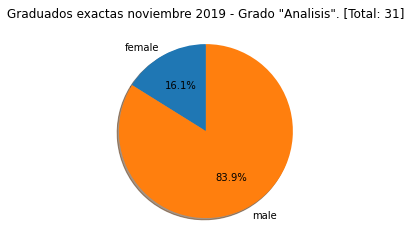

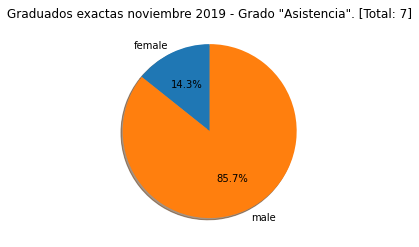

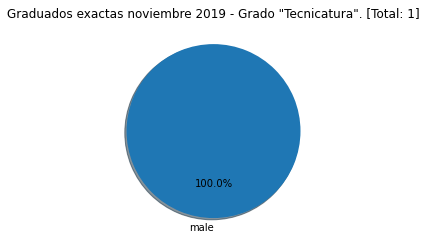

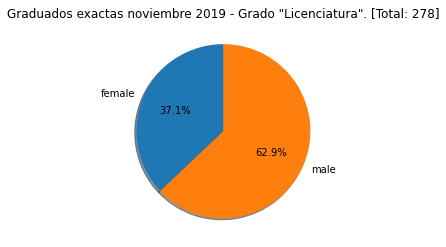

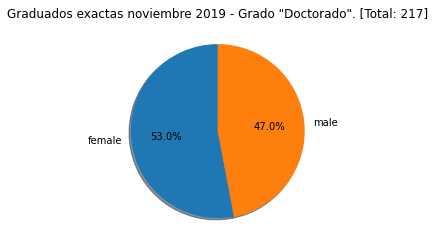

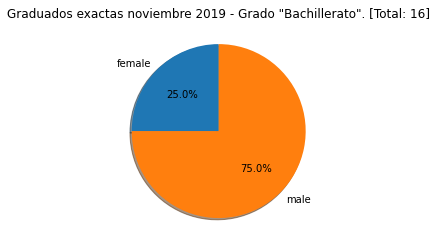

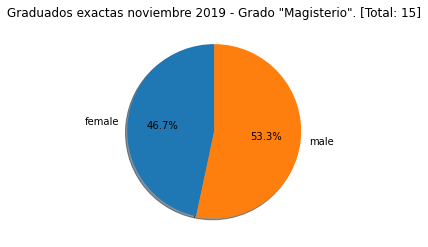

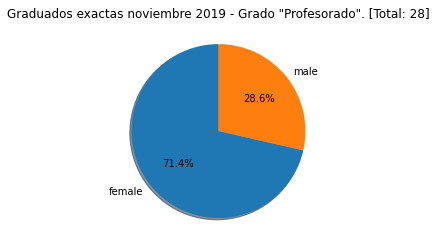

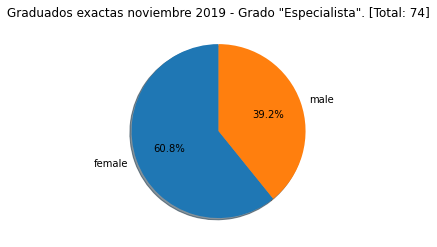

In [81]:
for grado in grados:
    df_plot = df_groupped_grado.loc[ df_groupped_grado.index.get_level_values(0) == grado ]
    sizes = df_plot['total'].values
    labels = df_plot.index.get_level_values(1).values
    fig1, ax1 = plt.subplots()
    plt.title('Graduados exactas noviembre 2019 - Grado "{grado}". [Total: {total_sum}]'.format(grado=grado, total_sum=df_plot.total.sum()))
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
    plt.show()

### Plot general

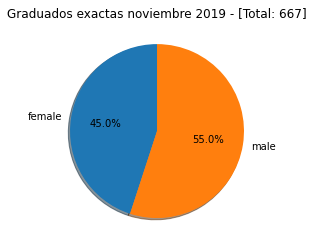

In [84]:
sizes = df_groupped['total'].values
labels = df_groupped.index.get_level_values(0).values
fig1, ax1 = plt.subplots()
plt.title('Graduados exactas noviembre 2019 - [Total: {total_sum}]'.format(total_sum=df_groupped.total.sum()))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()